First Cell is just to fetch the dataset from
https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease with ucimlrepo library.

Then we convert it to pandas dataframe.

In [76]:
from numpy.ma.extras import row_stack
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
df = chronic_kidney_disease.data.original

df


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Next we modify the dataframe to have exactly this:

 * age
 * blood pressure
 * specific gravity
 * albumin
 * sugar
 * blood glucose random
 * blood urea
 * sodium
 * potassium
 * hemoglobin
 * packed cell volume
 * white blood cell count
 * red blood cell count
 * class

We use .drop command to delete columns we don't need.

In [77]:
df.drop(columns=['rbc','pc', 'pcc', 'ba', 'sc','htn', 'dm', 'cad', 'appet', 'pe', 'ane'],inplace=True)


Check the dataframe after dropping.


In [78]:
df


,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


Next we divide 'hemo'-column by 10, so that we get liters instead of deciliters.

In [79]:
df['hemo'] = df['hemo'] / 10

In [80]:
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,notckd


Check unique rows in 'class'-column.

In [81]:
df['class'].unique()

<StringArray>
['ckd', 'ckd\t', 'notckd']
Length: 3, dtype: str

With lambda function recode 'notckd' = 'c' and 'ckd' or 'ckd\t' = 'a'

In [82]:
df['class'] = df['class'].apply(lambda x: 'c' if x == 'notckd' else 'a')

In [83]:
df['class'].unique()


<StringArray>
['a', 'c']
Length: 2, dtype: str

In [84]:
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,a
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38.0,6000.0,NaN,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,c


Check how many null values we have in each column, when we know that we have 400 entries in total.

In [85]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     356 non-null    float64
 6   bu      381 non-null    float64
 7   sod     313 non-null    float64
 8   pot     312 non-null    float64
 9   hemo    348 non-null    float64
 10  pcv     329 non-null    float64
 11  wbcc    294 non-null    float64
 12  rbcc    269 non-null    float64
 13  class   400 non-null    str    
dtypes: float64(13), str(1)
memory usage: 43.9 KB


Drop rows with less than 11 non-null values. So rows with 3 or more null-values will get dropped.

In [86]:
df.dropna(thresh=11)

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39.0,7800.0,4.4,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,c


Had to add the inplace=True, so that it actually updates the dataframe.

In [89]:
df.dropna(thresh=11, inplace=True)

Now in the dataframe for example id 1 is deleted, because it had 4 NaN-values.

In [90]:
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39.0,7800.0,4.4,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,c


Next we split the dataframe in two.

In [91]:
df_a = df[df['class'] == 'a']

In [92]:
df_c = df[df['class'] == 'c']

Dataframe entries match earlier total of 298 entries. (154 + 144)

In [93]:
df_a.info()

<class 'pandas.DataFrame'>
Index: 154 entries, 0 to 249
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     151 non-null    float64
 1   bp      151 non-null    float64
 2   sg      146 non-null    float64
 3   al      146 non-null    float64
 4   su      146 non-null    float64
 5   bgr     144 non-null    float64
 6   bu      152 non-null    float64
 7   sod     124 non-null    float64
 8   pot     124 non-null    float64
 9   hemo    152 non-null    float64
 10  pcv     147 non-null    float64
 11  wbcc    134 non-null    float64
 12  rbcc    120 non-null    float64
 13  class   154 non-null    str    
dtypes: float64(13), str(1)
memory usage: 18.0 KB


In [94]:
df_c.info()

<class 'pandas.DataFrame'>
Index: 144 entries, 250 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     144 non-null    float64
 1   bp      142 non-null    float64
 2   sg      140 non-null    float64
 3   al      140 non-null    float64
 4   su      140 non-null    float64
 5   bgr     140 non-null    float64
 6   bu      140 non-null    float64
 7   sod     141 non-null    float64
 8   pot     141 non-null    float64
 9   hemo    141 non-null    float64
 10  pcv     143 non-null    float64
 11  wbcc    140 non-null    float64
 12  rbcc    140 non-null    float64
 13  class   144 non-null    str    
dtypes: float64(13), str(1)
memory usage: 16.9 KB


In [95]:
import matplotlib.pyplot as plt

We define a function to plot histograms for all numerical columns

In [96]:
def plot_data(df):
    plt.figure(figsize=(10,10))
    for i, col in  enumerate(df.select_dtypes(include = ['float'])):
        plt.subplot(4, 4, i+1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)

First we plot histograms for all numerical features in class a (ckd)

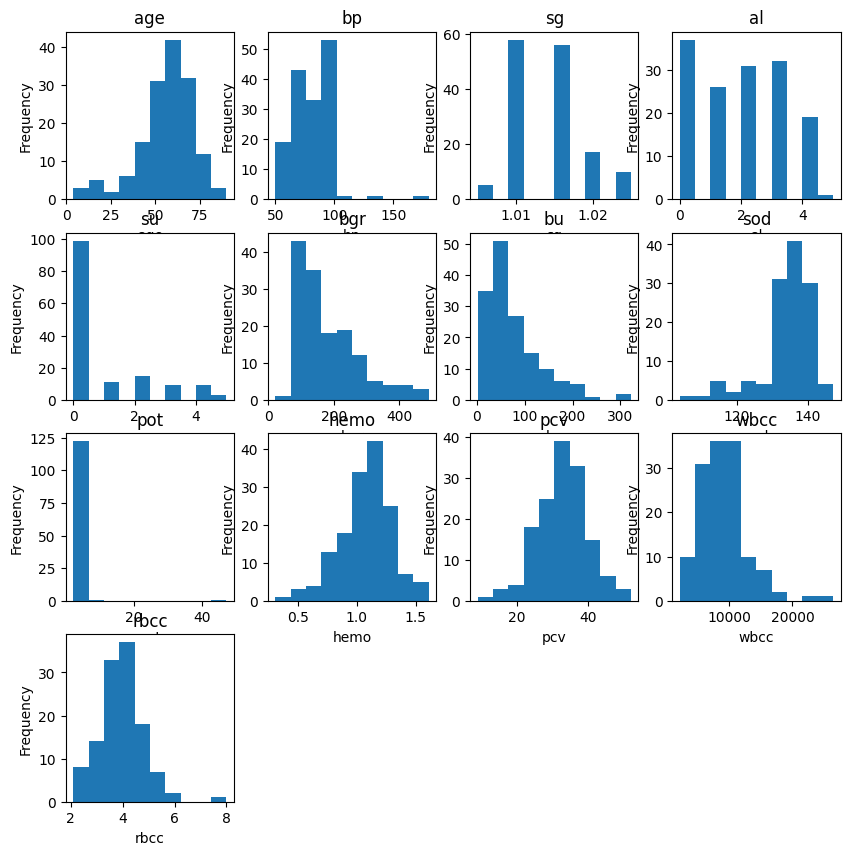

In [97]:
plot_data(df_a)

Then we plot histograms for all numerical features in class c (notckd)

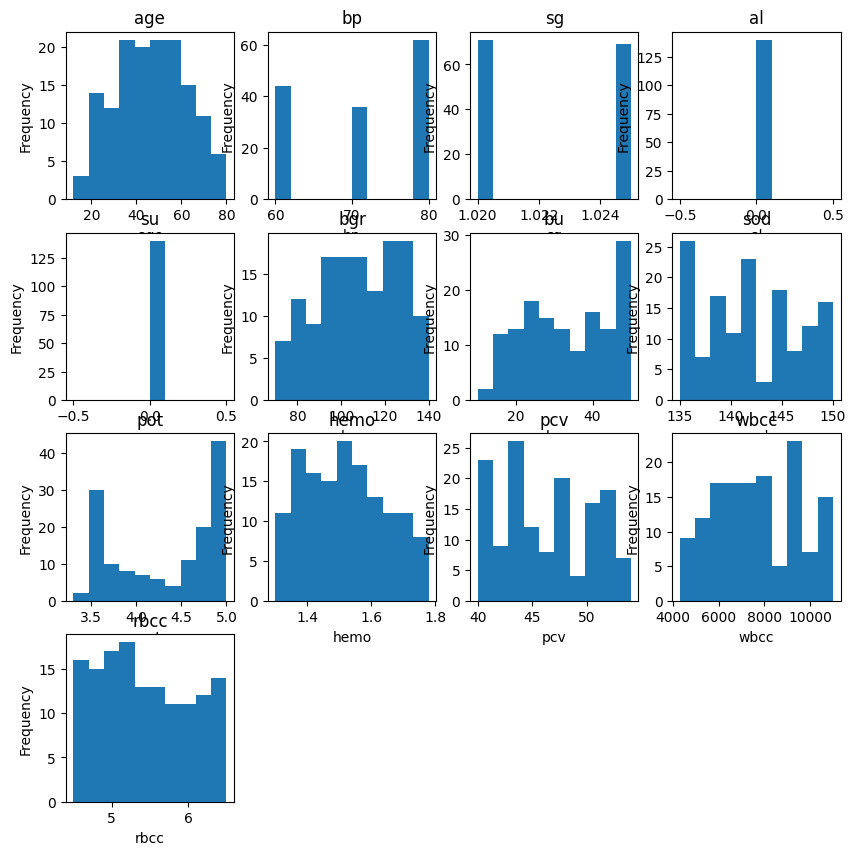

In [98]:
plot_data(df_c)

We calculate correlations between numerical features for each class

In [99]:
corr_c = df_c.drop(columns=['class']).corr()
corr_a = df_a.drop(columns=['class']).corr()

We visualize feature correlations for ckd patients using a heatmap  
Warm colors indicate positive and cool colors indicate negative correlations

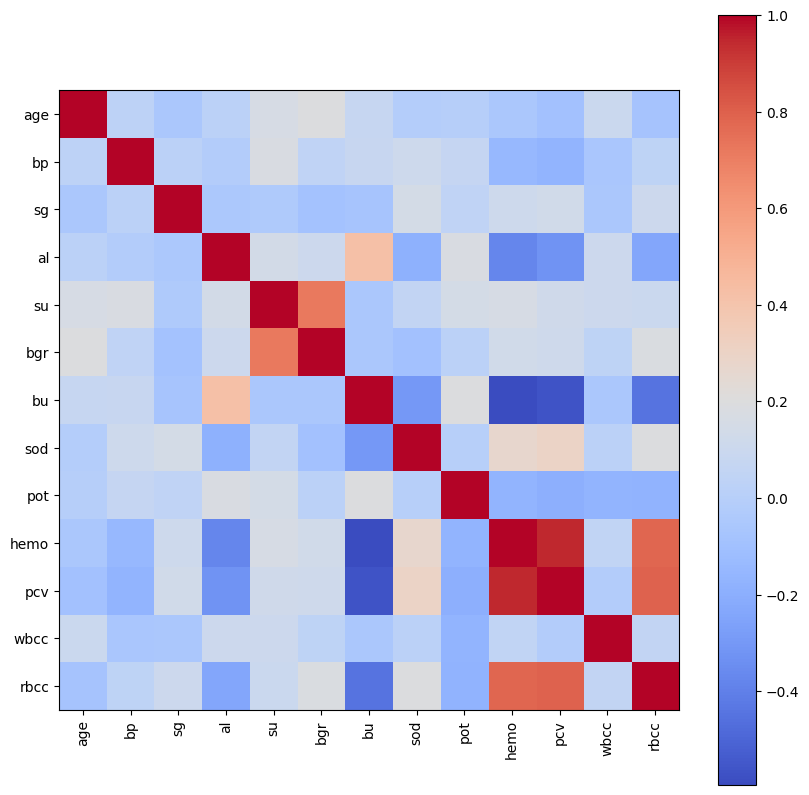

In [100]:
plt.figure(figsize=(10, 10))
plt.imshow(corr_a, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_c)), corr_c.columns, rotation=90)
plt.yticks(range(len(corr_c)), corr_c.columns)
plt.show()

Finally, we also visualize feature correlations for Non-CKD patients using a heatmap

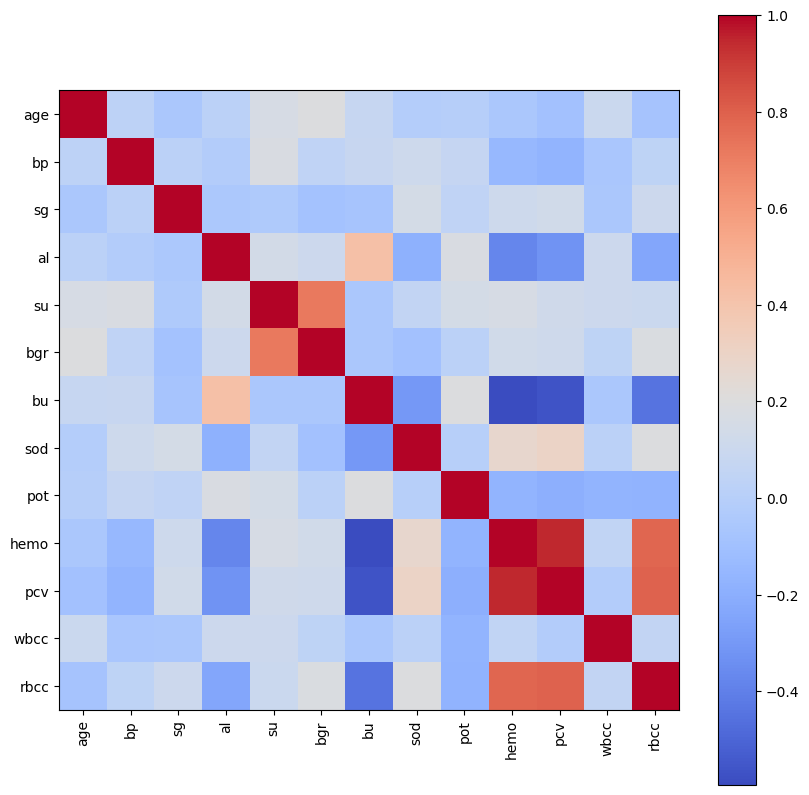

In [101]:
plt.figure(figsize=(10, 10))
plt.imshow(corr_a, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_a)), corr_a.columns, rotation=90)
plt.yticks(range(len(corr_a)), corr_a.columns)
plt.show()